# Logistic Regression Model

In [103]:

import pandas as pd
import numpy as np
from sklearn import preprocessing

trainingDf = pd.read_csv('./train_dataset.csv.xls')

print(trainingDf.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [104]:
print("============COLUMNS WITH EMPTY VALUE=============")
print(trainingDf.columns[trainingDf.isna().any()].tolist())


============COLUMNS WITH EMPTY VALUE=============
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [105]:
#Dropping loan_id
trainingDf = trainingDf.drop(columns=['Loan_ID'])

#Populating rows with null data with default values
trainingDf['Gender'] = trainingDf['Gender'].fillna('unknown')
trainingDf['Married'] = trainingDf['Married'].fillna('unknown')
trainingDf['Self_Employed'] = trainingDf['Self_Employed'].fillna('unknown')
trainingDf['Dependents'] = trainingDf['Dependents'].fillna(0)

#Dropping rows with empty values for following columns 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
trainingDf = trainingDf[trainingDf['LoanAmount'].notna()]
trainingDf = trainingDf[trainingDf['Loan_Amount_Term'].notna()]
trainingDf = trainingDf[trainingDf['Credit_History'].notna()]

trainingDf['Dependents'].replace(
    to_replace=['3+'],
    value='4',
    inplace=True
)

In [106]:

print("============COLUMNS WITH EMPTY VALUE=============")
print(trainingDf.columns[trainingDf.isna().any()].tolist())
print("Remaining rows after dropping data:", len(trainingDf.index))

============COLUMNS WITH EMPTY VALUE=============
[]
Remaining rows after dropping data: 529


In [107]:
print("============UNIQUE VALUE FOR CATEGORICAL DATA=============")
print("Gender: ", trainingDf['Gender'].unique())
print("Married: ", trainingDf['Married'].unique())
print("Education: ", trainingDf['Education'].unique())
print("Self_Employed: ", trainingDf['Self_Employed'].unique())
print("Property_Area: ", trainingDf['Property_Area'].unique())
print('\n')

============UNIQUE VALUE FOR CATEGORICAL DATA=============
Gender:  ['Male' 'Female' 'unknown']
Married:  ['Yes' 'No' 'unknown']
Education:  ['Graduate' 'Not Graduate']
Self_Employed:  ['No' 'Yes' 'unknown']
Property_Area:  ['Rural' 'Urban' 'Semiurban']




In [108]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


train, test = train_test_split(trainingDf, test_size=0.2, random_state=23)
print(train.head())
X_train, y_train = train.copy().drop(columns=['Loan_Status']), train['Loan_Status']
X_test, y_test = test.copy().drop(columns=['Loan_Status']), test['Loan_Status']

Categorical_columns = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]
Numerical_columns = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]

Categorical_X_train = X_train[Categorical_columns]
Categorical_X_test = X_test[Categorical_columns]

Numerical_X_train = X_train[Numerical_columns]
Numerical_X_test = X_test[Numerical_columns]

encoder = preprocessing.OneHotEncoder()
encoder.fit(Categorical_X_train)
Categorical_X_train_encoded = encoder.transform(Categorical_X_train).toarray()
Categorical_X_test_encoded = encoder.transform(Categorical_X_test).toarray()

print(Numerical_X_train.head())

standard_Scaler = preprocessing.MinMaxScaler()
standard_Scaler.fit(Numerical_X_train)
Numerical_X_train_encoded = standard_Scaler.transform(Numerical_X_train)
Numerical_X_test_encoded = standard_Scaler.transform(Numerical_X_test)

y_encoder = preprocessing.LabelEncoder()
y_encoder.fit(y_train)
Y_train_encoded = y_encoder.transform(y_train)
Y_test_encoded = y_encoder.transform(y_test)

Combined_X_train_encoded = np.concatenate((Categorical_X_train_encoded, Numerical_X_train_encoded), axis=1)
#print(Combined_X_train_encoded)
Combined_X_test_encoded = np.concatenate((Categorical_X_test_encoded, Numerical_X_test_encoded), axis=1)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
330    Male      No          1      Graduate            No             4384   
410  Female      No          1  Not Graduate           Yes             3867   
217    Male     Yes          0      Graduate            No             3727   
143    Male     Yes          0      Graduate            No             2698   
525    Male     Yes          2      Graduate           Yes            17500   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
330             1793.0       117.0             360.0             1.0   
410                0.0        62.0             360.0             1.0   
217             1775.0       131.0             360.0             1.0   
143             2034.0       122.0             360.0             1.0   
525                0.0       400.0             360.0             1.0   

    Property_Area Loan_Status  
330         Urban           Y  
410     Semiurban           

### 1) Logistic Regression Model

In [109]:
#model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
import numpy as np

print("============LOGISTIC REGRESSION MODEL=============")
lr_model = LogisticRegression()
lr_model.fit(Combined_X_train_encoded,Y_train_encoded)
y_predicted = lr_model.predict(Combined_X_test_encoded)
print("Accuracy is ", accuracy_score(y_predicted,Y_test_encoded))
print("Mean Square Error : ", mean_squared_error(Y_test_encoded, y_predicted))
print(confusion_matrix(y_predicted,Y_test_encoded))
print("Classification Report : ")
print(classification_report(Y_test_encoded, y_predicted))

============LOGISTIC REGRESSION MODEL=============
Accuracy is  0.8207547169811321
Mean Square Error :  0.1792452830188679
[[23  0]
 [19 64]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        42
           1       0.77      1.00      0.87        64

    accuracy                           0.82       106
   macro avg       0.89      0.77      0.79       106
weighted avg       0.86      0.82      0.81       106



### 2) 10-fold cross validation to generalize the Logistic Regression Model

In [110]:
# To find list of accuracy and MSE values of the model using K-fold cross validation

from sklearn.model_selection import KFold

print("============LOGISTIC REGRESSION MODEL USING 10-FOLD CROSS VALIDATION=============")
kf = KFold(n_splits=10)
X = trainingDf.copy().drop(columns=['Loan_Status'])
y = trainingDf['Loan_Status']

#re-split the processed data into X and y then encode before doing 10-cross validation
Categorical_X = X[Categorical_columns]
#print(Categorical_X)
Numerical_X = X[Numerical_columns]

encoder = preprocessing.OneHotEncoder()
encoder.fit(Categorical_X)
Categorical_X_encoded = encoder.transform(Categorical_X).toarray()

#print(Categorical_X_encoded)

standard_Scaler.fit(Numerical_X)
Numerical_X_encoded = standard_Scaler.transform(Numerical_X)
#print(Numerical_X_encoded)

y_encoder.fit(y)
Y_encoded = y_encoder.transform(y)

Combined_X_encoded = np.concatenate((Categorical_X_encoded, Numerical_X_encoded), axis=1)

#print(Combined_X_encoded)

idx = 0
for train_indices, test_indices in kf.split(Combined_X_encoded):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    lr_model.fit(Combined_X_encoded[start_train:stop_train], Y_encoded[start_train:stop_train])
    pred = lr_model.predict(Combined_X_encoded[start_test:stop_test])

    idx+=1
    print("Accuracy for batch ", idx, " : ", accuracy_score(Y_encoded[start_test:stop_test], pred))
    print("Mean Square Error for batch ", idx, " : ", mean_squared_error(Y_encoded[start_test:stop_test], pred))

============LOGISTIC REGRESSION MODEL USING 10-FOLD CROSS VALIDATION=============
Accuracy for batch  1  :  0.7735849056603774
Mean Square Error for batch  1  :  0.22641509433962265
Accuracy for batch  2  :  0.8490566037735849
Mean Square Error for batch  2  :  0.1509433962264151
Accuracy for batch  3  :  0.7547169811320755
Mean Square Error for batch  3  :  0.24528301886792453
Accuracy for batch  4  :  0.7735849056603774
Mean Square Error for batch  4  :  0.22641509433962265
Accuracy for batch  5  :  0.8301886792452831
Mean Square Error for batch  5  :  0.16981132075471697
Accuracy for batch  6  :  0.7547169811320755
Mean Square Error for batch  6  :  0.24528301886792453
Accuracy for batch  7  :  0.8490566037735849
Mean Square Error for batch  7  :  0.1509433962264151
Accuracy for batch  8  :  0.8679245283018868
Mean Square Error for batch  8  :  0.1320754716981132
Accuracy for batch  9  :  0.8301886792452831
Mean Square Error for batch  9  :  0.16981132075471697
Accuracy for batch  1

### 3) Naïve Bayes Classifier for Numerical Attributes

In [111]:
#Calssify using Naive Bayes for numerical attributes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report 

print("============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES=============")

GNB = GaussianNB()

GNB.fit(Numerical_X_train_encoded, Y_train_encoded)

print("Classification report for train datasets:")
print(classification_report(Y_train_encoded, GNB.predict(Numerical_X_train_encoded)))
print("***************************************************************************")
print("Classification report for test datasets:")
print(classification_report(Y_test_encoded, GNB.predict(Numerical_X_test_encoded)))

============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES=============
Classification report for train datasets:
              precision    recall  f1-score   support

           0       0.77      0.47      0.58       121
           1       0.82      0.94      0.88       302

    accuracy                           0.81       423
   macro avg       0.79      0.71      0.73       423
weighted avg       0.80      0.81      0.79       423

***************************************************************************
Classification report for test datasets:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69        42
           1       0.77      0.97      0.86        64

    accuracy                           0.80       106
   macro avg       0.84      0.76      0.77       106
weighted avg       0.83      0.80      0.79       106



### 4) 10-fold cross validation to generalize the Naïve Bayes Classifier for Numerical Attributes

In [112]:
# To find list of accuracy and MSE values of the model using K-fold cross validation

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

print("============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============")

idx = 0
for train_indices, test_indices in kf.split(Numerical_X_encoded):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    GNB.fit(Numerical_X_encoded[start_train:stop_train], Y_encoded[start_train:stop_train])
    pred = GNB.predict(Numerical_X_encoded[start_test:stop_test])

    idx+=1
    print("Accuracy for batch ", idx, " : ", accuracy_score(Y_encoded[start_test:stop_test], pred))
    print("Mean Square Error for batch ", idx, " : ", mean_squared_error(Y_encoded[start_test:stop_test], pred))

============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============
Accuracy for batch  1  :  0.7547169811320755
Mean Square Error for batch  1  :  0.24528301886792453
Accuracy for batch  2  :  0.8490566037735849
Mean Square Error for batch  2  :  0.1509433962264151
Accuracy for batch  3  :  0.7547169811320755
Mean Square Error for batch  3  :  0.24528301886792453
Accuracy for batch  4  :  0.7547169811320755
Mean Square Error for batch  4  :  0.24528301886792453
Accuracy for batch  5  :  0.8113207547169812
Mean Square Error for batch  5  :  0.18867924528301888
Accuracy for batch  6  :  0.7547169811320755
Mean Square Error for batch  6  :  0.24528301886792453
Accuracy for batch  7  :  0.8301886792452831
Mean Square Error for batch  7  :  0.16981132075471697
Accuracy for batch  8  :  0.8490566037735849
Mean Square Error for batch  8  :  0.1509433962264151
Accuracy for batch  9  :  0.8113207547169812
Mean Square Error for batch  9  :  0.1886792452830188

### 5) Naïve Bayes Classifier for Categorical Attributes

In [113]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import CategoricalNB

print("============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES=============")

NB = CategoricalNB() 

NB.fit(Categorical_X_train_encoded, Y_train_encoded)
print(classification_report(Y_test_encoded, NB.predict(Categorical_X_test_encoded)))

============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES=============
              precision    recall  f1-score   support

           0       0.47      0.19      0.27        42
           1       0.62      0.86      0.72        64

    accuracy                           0.59       106
   macro avg       0.54      0.52      0.50       106
weighted avg       0.56      0.59      0.54       106



### 6) 10-fold cross validation to generalize the Naïve Bayes Classifier for Categorical Attributes

In [114]:
from sklearn.model_selection import KFold

print("============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============")

kf = KFold(n_splits=10)

idx = 0
for train_indices, test_indices in kf.split(Categorical_X_encoded):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    GNB.fit(Categorical_X_encoded[start_train:stop_train], Y_encoded[start_train:stop_train])
    pred = GNB.predict(Categorical_X_encoded[start_test:stop_test])

    idx+=1
    print("Accuracy for batch ", idx, " : ", accuracy_score(Y_encoded[start_test:stop_test], pred))
    print("Mean Square Error for batch ", idx, " : ", mean_squared_error(Y_encoded[start_test:stop_test], pred))

============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============
Accuracy for batch  1  :  0.41509433962264153
Mean Square Error for batch  1  :  0.5849056603773585
Accuracy for batch  2  :  0.2830188679245283
Mean Square Error for batch  2  :  0.7169811320754716
Accuracy for batch  3  :  0.41509433962264153
Mean Square Error for batch  3  :  0.5849056603773585
Accuracy for batch  4  :  0.2830188679245283
Mean Square Error for batch  4  :  0.7169811320754716
Accuracy for batch  5  :  0.3018867924528302
Mean Square Error for batch  5  :  0.6981132075471698
Accuracy for batch  6  :  0.3584905660377358
Mean Square Error for batch  6  :  0.6415094339622641
Accuracy for batch  7  :  0.37735849056603776
Mean Square Error for batch  7  :  0.6226415094339622
Accuracy for batch  8  :  0.33962264150943394
Mean Square Error for batch  8  :  0.660377358490566
Accuracy for batch  9  :  0.32075471698113206
Mean Square Error for batch  9  :  0.6792452830188679

### 7) Support Vector Machines
Support Vector Machines are supervised learning algorithms that are well supported for classification and regression problems due to their significant accuracy. The goal of an SVM is to find decision boundaries, also known as hyperplanes, within an N-dimension plane (where N is the number of features) that help classify the samples given. The position and orientation of the hyperplane is influenced by support vectors, data points that are closer to the hyperplane, which help build the model. Since the loan prediction is a binary classification problem, using an SVM is a good approach to creating a predictive model.

The first SVM uses a Gaussian (or radial basis function) kernel which is a non-linear SVM that uses the euclidian distance between two points to help classify the samples.

============ RBF Kernal =============
Training: 
              precision    recall  f1-score   support

           0       0.88      0.40      0.55       121
           1       0.80      0.98      0.88       302

    accuracy                           0.81       423
   macro avg       0.84      0.69      0.72       423
weighted avg       0.82      0.81      0.79       423

Testing: 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        42
           1       0.77      1.00      0.87        64

    accuracy                           0.82       106
   macro avg       0.89      0.77      0.79       106
weighted avg       0.86      0.82      0.81       106

huh


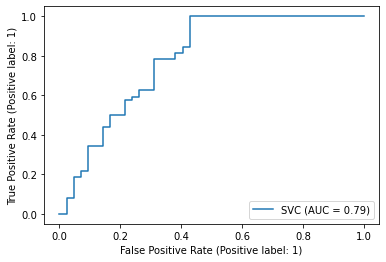

In [154]:
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
print("============ RBF Kernal =============")
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(Combined_X_train_encoded, Y_train_encoded)
print("Training: ")
print(classification_report(Y_train_encoded, clf_rbf.predict(Combined_X_train_encoded)))
print("Testing: ")
print(classification_report(Y_test_encoded, clf_rbf.predict(Combined_X_test_encoded)))
metrics.plot_roc_curve(clf_rbf, Combined_X_test_encoded, Y_test_encoded)

The second SVM is a linear SVM which removes all of the data points that are not closer to the hyperplane, resulting with only support vectors.

============ Linear Kernal =============
Training: 
              precision    recall  f1-score   support

           0       0.88      0.41      0.56       121
           1       0.81      0.98      0.88       302

    accuracy                           0.82       423
   macro avg       0.84      0.70      0.72       423
weighted avg       0.83      0.82      0.79       423

Testing: 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        42
           1       0.77      1.00      0.87        64

    accuracy                           0.82       106
   macro avg       0.89      0.77      0.79       106
weighted avg       0.86      0.82      0.81       106



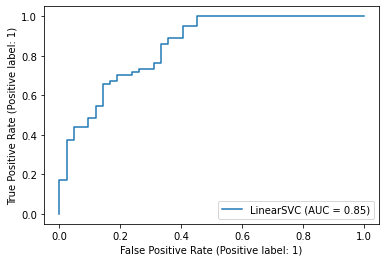

In [155]:
print("============ Linear Kernal =============")
clf_lin = LinearSVC(dual=False)
clf_lin.fit(Combined_X_train_encoded, Y_train_encoded)
print("Training: ")
print(classification_report(Y_train_encoded, clf_lin.predict(Combined_X_train_encoded)))
print("Testing: ")
print(classification_report(Y_test_encoded, clf_lin.predict(Combined_X_test_encoded)))
metrics.plot_roc_curve(clf_lin, Combined_X_test_encoded, Y_test_encoded)

Both of the SVMs have similar results, but the Linear SVM is slightly better. This could be due to the large dataset which increases the complexity of non-linear SVMs. On the other hand, the linear SVM will not increase in complexity with larger datasets.

### 8) Artificial Neural Network

Training: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.71      1.00      0.83       302

    accuracy                           0.71       423
   macro avg       0.36      0.50      0.42       423
weighted avg       0.51      0.71      0.59       423

Testing: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.60      1.00      0.75        64

    accuracy                           0.60       106
   macro avg       0.30      0.50      0.38       106
weighted avg       0.36      0.60      0.45       106



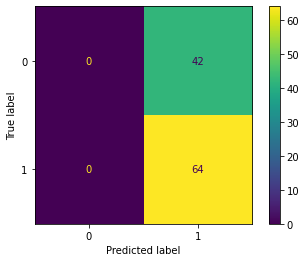

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(12,4), activation='logistic', solver = 'sgd', max_iter = 500, learning_rate_init = 0.3, random_state=1)
clf.fit(Combined_X_train_encoded, Y_train_encoded)
cm = confusion_matrix(Y_test_encoded, clf.predict(Combined_X_test_encoded))
ConfusionMatrixDisplay(cm).plot()

print("Training: ")
print(classification_report(Y_train_encoded, clf.predict(Combined_X_train_encoded), zero_division=0))
print("Testing: ")
print(classification_report(Y_test_encoded, clf.predict(Combined_X_test_encoded), zero_division=0))